## 사용 라이브러리

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 데이터 불러오기

In [2]:
train = pd.read_csv("data/train.csv", encoding="utf-8")
train.shape

(891, 12)

## 데이터 정보 확인하기

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 결측치 확인

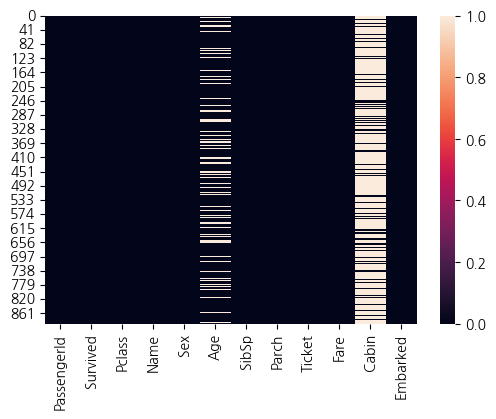

In [4]:
fig, ax = plt.subplots(1, figsize=(6, 4))
sns.heatmap(train.isnull(), ax=ax)
plt.show()

In [5]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## 생존자

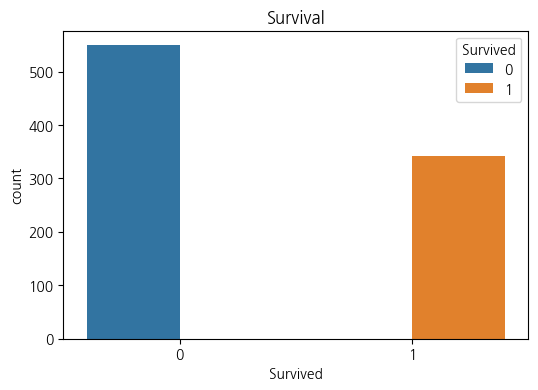

In [6]:
plt.figure(figsize = (6, 4))
sns.countplot(data = train, x = "Survived", hue = "Survived");
plt.title("Survival");

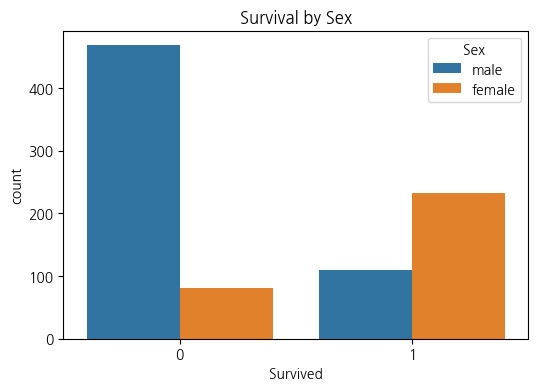

In [7]:
plt.figure(figsize = (6, 4))
sns.countplot(data = train, x = "Survived", hue = "Sex");
plt.title("Survival by Sex");

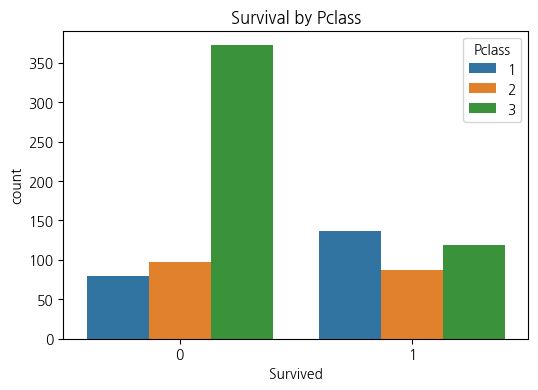

In [8]:
plt.figure(figsize = (6, 4))
sns.countplot(data = train, x = "Survived", hue = "Pclass");
plt.title("Survival by Pclass");

## Data Cleaning

### Age

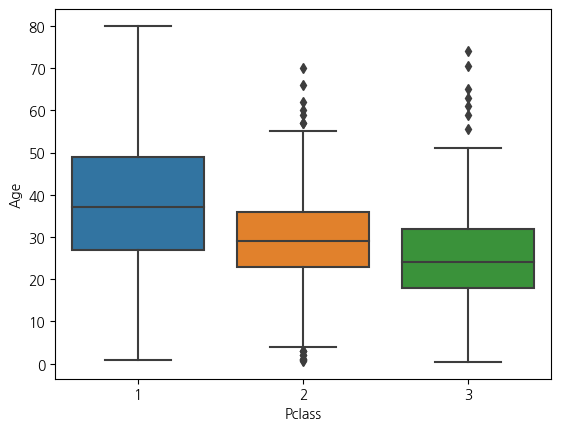

In [9]:
sns.boxplot(data = train, x = "Pclass", y = "Age");

In [10]:
train.groupby(["Pclass"])["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


결측치가 있는 Age를 Pclass의 평균 나이값을 이용해 대체

In [11]:
train["Age_nan"] = train["Age"].replace(0,np.nan)
train["Age_nan"].isnull().sum()

177

In [12]:
Pclass_mean = train["Pclass"].mean()

In [13]:
train["Age_fill"] = train["Age_nan"]
train.loc[train["Age_nan"].isnull(), "Age_fill"] = Pclass_mean

In [14]:
train["Age_fill"].isnull().sum()

0

## 범주형 데이터 변환

범주형 데이터는 학습에서 바로 사용이 불가능하기 때문에 수치형으로 변환이 필요합니다.
예를 들어, Sex의 경우 Male=0, Female=1과 같이 변환을 합니다.

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_nan      714 non-null    float64
 13  Age_fill     891 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


현재 범주형 데이터는, Name, Sex, Ticket, Embarked가 있음

pd.get_dummies
학습 이전에 모든 데이터를 수치로 변환해주는 전처리 작업이 필요함

수치형 데이터로 변환
수치화된 데이터를 가변수화

Note!!! - 가변수화

수치형 데이터로만 변환하면, 서로 간의 관계성이 생기게 되어버림

월, 화, 수 ... -> 1, 2, 3 ...
1+2=3 / 월+화=수라는 관계성이 성립해버림

pandas의 get_dummies 함수는 원핫인코딩을 이용하는 방식
get_dummies(data=, prefix=, prefix_sep=, dummy_na=, columns=, drop_first=, dtype=) 형식으로 존재함

* data: one-hot encoding을 적용할 데이터
* prefix: 생성할 더미 데이터(가변수화된 데이터)의 컬럼 prefix
* prefixsep: `default=''`
* dummpy_na: NaN도 포함시킬지, default=False
* columns: 대상 컬럼
* drop_first: k개의 범주를 k-1개로 가변수화할 경우 사용
* dtype: 새로운 columns의 데이터 타입

In [17]:
temp_d = pd.get_dummies(train, columns = ["Sex", "Embarked"])
temp_d = temp_d.drop(columns = ["Name", "Ticket", "Cabin", "Sex_female", "Embarked_C"])
temp_d.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_nan,Age_fill,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,22.0,22.0,1,0,1
1,2,1,1,38.0,1,0,71.2833,38.0,38.0,0,0,0
2,3,1,3,26.0,0,0,7.9250,26.0,26.0,0,0,1
3,4,1,1,35.0,1,0,53.1000,35.0,35.0,0,0,1
4,5,0,3,35.0,0,0,8.0500,35.0,35.0,1,0,1
